# Logistic Regression

### import libraries

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### read csv file

In [57]:
df = pd.read_csv('bank-full.csv' , sep=';')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


## EDA

In [58]:
df.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

In [59]:
df.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [60]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [61]:
df['y'].describe()

count     45211
unique        2
top          no
freq      39922
Name: y, dtype: object

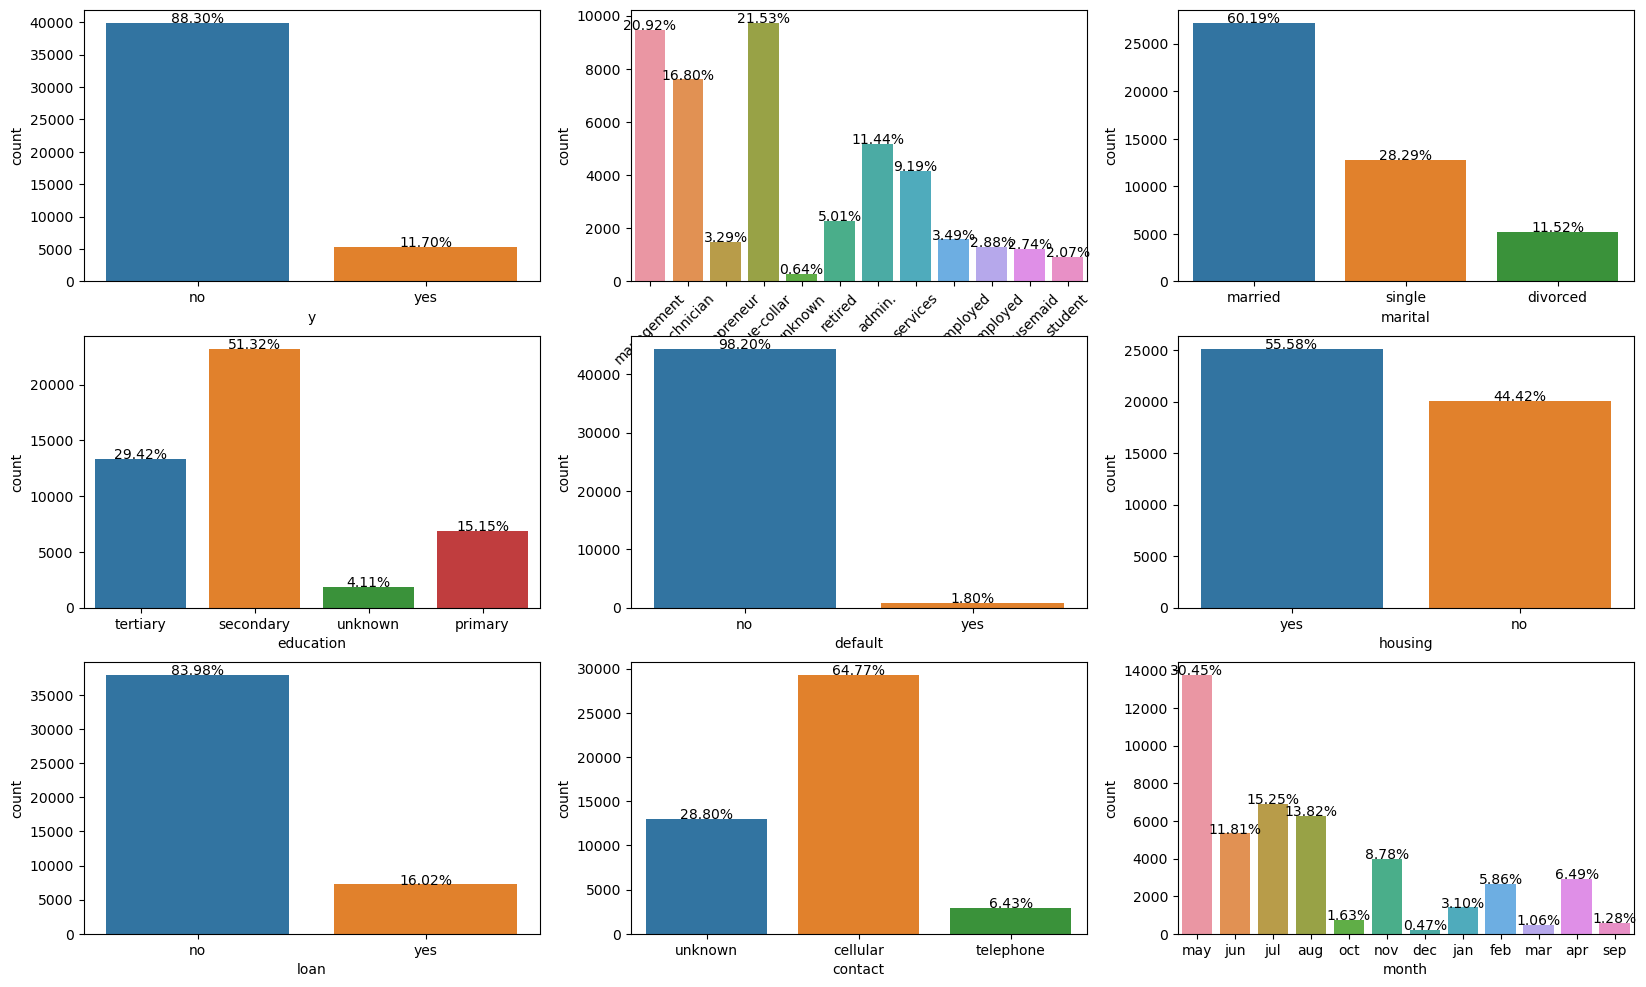

In [62]:
categoricals = ['y', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']

def pltCountplot(cats):
    
    fig, axis = plt.subplots(len(cats) // 3,3, figsize=(20,12))  

    index = 0
    for i in range(len(cats) // 3):
        for j in range(3):
            
            ax = sns.countplot(x=cats[index], data=df, ax=axis[i][j])

            if cats[index] == 'job' :
                for item in ax.get_xticklabels():
                    item.set_rotation(45)
                
            for p in ax.patches:
                height = p.get_height()
                ax.text(p.get_x()+p.get_width()/2.,
                        height + 3,
                        '{:1.2f}%'.format(height/len(df)*100),
                        ha="center") 
            index += 1

pltCountplot(categoricals)

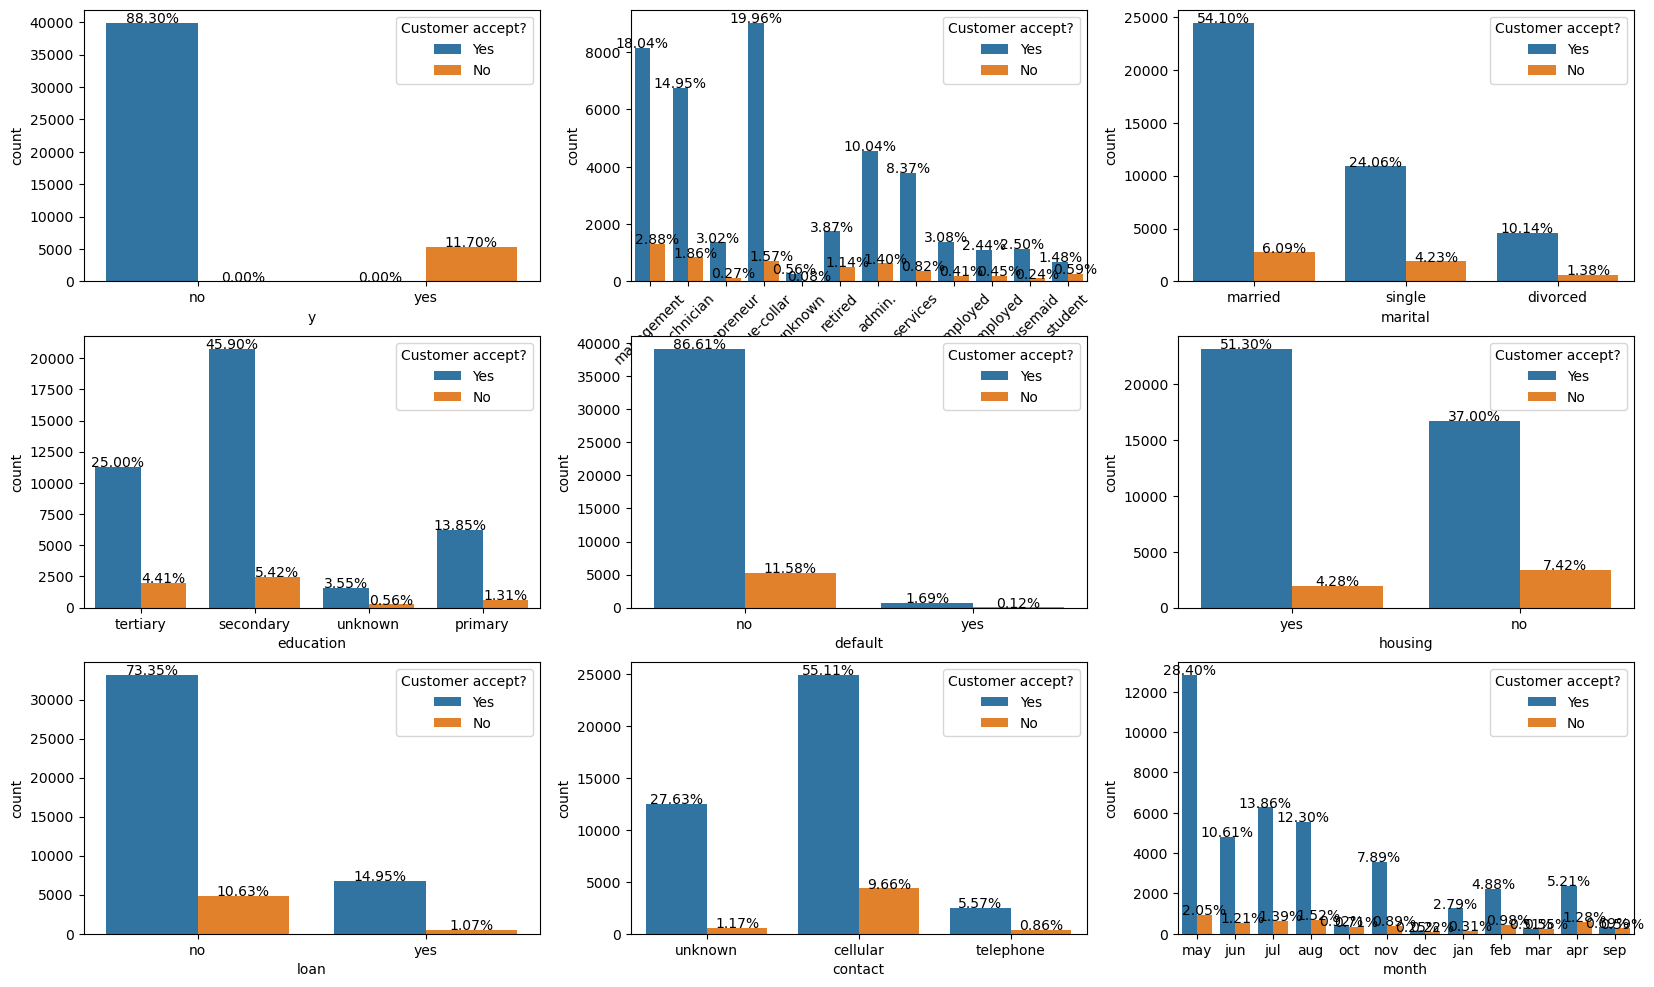

In [63]:
def pltCountplotHueTarget(cats, target):
    
    fig, axis = plt.subplots(len(cats) // 3,3, figsize=(20,12))  

    index = 0
    for i in range(len(cats) // 3):
        for j in range(3):
            
            ax = sns.countplot(x=cats[index], data=df, hue=target, ax=axis[i][j])
            
            ax.legend(title='Customer accept?',
                      loc='upper right',
                      labels=['Yes', 'No'])
            
            if cats[index] == 'job' :
                for item in ax.get_xticklabels():
                    item.set_rotation(45)
                
            for p in ax.patches:
                height = p.get_height()
                ax.text(p.get_x()+p.get_width()/2.,
                        height + 3,
                        '{:1.2f}%'.format(height/len(df)*100),
                        ha="center") 
            index += 1
            
pltCountplotHueTarget(categoricals, 'y')

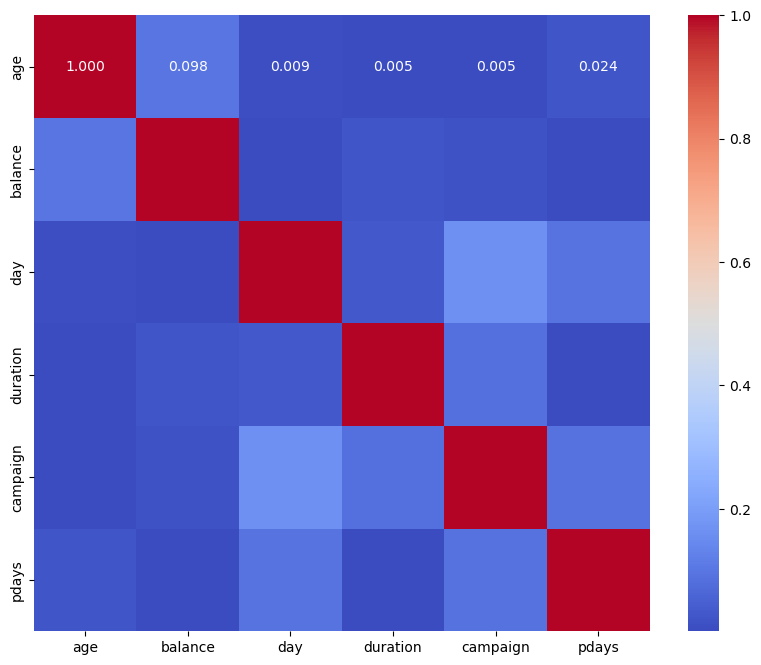

In [64]:
numeric_columns=['age', 'balance', 'day', 'duration', 'campaign', 'pdays']
corr_data = df.loc[:, numeric_columns].corr()

plt.figure(figsize=(10,8))
sns.heatmap(corr_data.abs(), annot=True, fmt='.3f',cmap='coolwarm',square=True)
plt.show()

In [65]:
df.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

In [66]:
df.head(1)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no


## Encoding categorical attribut

In [67]:
df['default'] = df['default'].apply(lambda x: 0 if x == 'no' else 1)
df['default'].unique()

df['housing'] = df['housing'].apply(lambda x: 0 if x == 'no' else 1)
df['housing'].unique()

df['loan'] = df['loan'].apply(lambda x: 0 if x == 'no' else 1)
df['loan'].unique()

df['y'] = df['y'].apply(lambda x: 0 if x == 'no' else 1)
df['y'].unique()

df['poutcome'] = df['poutcome'].apply(lambda x: 'unknown' if x == 'other' else x)
df['poutcome'].unique() 


array(['unknown', 'failure', 'success'], dtype=object)

In [68]:
df.dtypes

age           int64
job          object
marital      object
education    object
default       int64
balance       int64
housing       int64
loan          int64
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y             int64
dtype: object

In [69]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,0,2143,1,0,unknown,5,may,261,1,-1,0,unknown,0
1,44,technician,single,secondary,0,29,1,0,unknown,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,0,2,1,1,unknown,5,may,76,1,-1,0,unknown,0
3,47,blue-collar,married,unknown,0,1506,1,0,unknown,5,may,92,1,-1,0,unknown,0
4,33,unknown,single,unknown,0,1,0,0,unknown,5,may,198,1,-1,0,unknown,0


In [71]:
data_types = df.dtypes

non_numeric_cols = ['job', 'marital', 'education',  'contact', 'month', 'poutcome']
for col in non_numeric_cols:
    df[col] = df[col].astype('category')

encod = pd.get_dummies(df, columns=non_numeric_cols)


df = encod

In [55]:
df.dtypes


,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_success,poutcome_unknown
0,58,0,2143,1,0,5,261,1,-1,0,...,False,False,False,True,False,False,False,False,False,True
1,44,0,29,1,0,5,151,1,-1,0,...,False,False,False,True,False,False,False,False,False,True
2,33,0,2,1,1,5,76,1,-1,0,...,False,False,False,True,False,False,False,False,False,True
3,47,0,1506,1,0,5,92,1,-1,0,...,False,False,False,True,False,False,False,False,False,True
4,33,0,1,0,0,5,198,1,-1,0,...,False,False,False,True,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,0,825,0,0,17,977,3,-1,0,...,False,False,False,False,True,False,False,False,False,True
45207,71,0,1729,0,0,17,456,2,-1,0,...,False,False,False,False,True,False,False,False,False,True
45208,72,0,5715,0,0,17,1127,5,184,3,...,False,False,False,False,True,False,False,False,True,False
45209,57,0,668,0,0,17,508,4,-1,0,...,False,False,False,False,True,False,False,False,False,True


### transform bool to int

In [72]:
bool_att = df.loc[: , 'job_admin.': ]
for b in bool_att:
    df[b] = df[b].astype(int)

In [73]:
df.dtypes

age                    int64
default                int64
balance                int64
housing                int64
loan                   int64
day                    int64
duration               int64
campaign               int64
pdays                  int64
previous               int64
y                      int64
job_admin.             int32
job_blue-collar        int32
job_entrepreneur       int32
job_housemaid          int32
job_management         int32
job_retired            int32
job_self-employed      int32
job_services           int32
job_student            int32
job_technician         int32
job_unemployed         int32
job_unknown            int32
marital_divorced       int32
marital_married        int32
marital_single         int32
education_primary      int32
education_secondary    int32
education_tertiary     int32
education_unknown      int32
contact_cellular       int32
contact_telephone      int32
contact_unknown        int32
month_apr              int32
month_aug     

## fit the model

In [74]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline


X = df.drop('y', axis=1)  
y = df['y']  


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = make_pipeline(StandardScaler(), LogisticRegression(max_iter=1000))


model.fit(X_train, y_train)


y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8988167643481145
